Este script de Python utiliza Selenium para automatizar la navegación web y extraer datos del sitio web de la SISALRIL
.

In [2]:
import pandas as pd # Importación de pandas para el manejo de datos
import numpy as np
import requests # Importación de requests para descargar archivos
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# Importación de librerías necesarias

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time

# Configuración del navegador Chrome
driveroptions = Options()
#.add_argument("--headless=new")# Ejecución en modo sin cabeza para no mostrar la ventana del navegador

# Inicialización del navegador Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=driveroptions)
driver.get('https://www.sisalril.gob.do/index.php/informaciones/estadisticas')

In [7]:
# Navegación a la URL deseada
wait = WebDriverWait(driver,timeout=5)

# Espera explícita para asegurar que la página se ha cargado completamente
wait.until(lambda a : driver.find_element(By.XPATH,"/html/body/div[2]/div/main/div/div[2]/section/div[3]/div[2]/a[1]/div").is_displayed())

# Click en el enlace deseado para acceder a más información
driver.find_element(By.XPATH,"/html/body/div[2]/div/main/div/div[2]/section/div[3]/div[2]/a[1]/div").click()

# Tiempo de espera para asegurar que la página se ha cargado completamente
time.sleep(1)

In [8]:
# Extracción de enlaces y nombres de archivos
file_code = []
file_name = []
file_link = []

# Extracción de enlaces y nombres de archivos de la sección específica de la página
for i in range(1,len(driver.find_elements(By.XPATH,"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div/a"))+1):
    file_name.append(driver.find_element(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div/a[{i}]").text)
    file_link.append(driver.find_element(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div/a[{i}]").get_attribute("href"))
    file_code.append(i)

# Creación de un DataFrame con los datos extraídos
folder_table = pd.DataFrame(data={'file_code':file_code,
                                'file_name':file_name,
                                'file_link':file_link
                                })    

folder_table

,file_code,file_name,file_link
0,1,Siniestralidad,https://www.sisalril.gob.do/index.php/informac...
1,2,Prestaciones,https://www.sisalril.gob.do/index.php/informac...
2,3,Financiamiento,https://www.sisalril.gob.do/index.php/informac...
3,4,Afiliación,https://www.sisalril.gob.do/index.php/informac...


In [9]:
# Tiempo de espera para asegurar que la página se ha cargado completamente
time.sleep(1)

# Iteración a través de los enlaces de archivos y extracción de datos adicionales
file_code = []
file_name = []
document_code = []
document_name = []
document_link = []
regimen_abv = []
periocidad_code = []

# Iteración a través de los enlaces de archivos para obtener información adicional
for index,row in folder_table.iterrows():
    driver.get(row["file_link"])
    time.sleep(1)
    for document in range(1,len(driver.find_elements(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div[2]/div"))+1):
        file_code.append(row["file_code"])
        file_name.append(row["file_name"])
        document_code.append(document)
        document_name.append(driver.find_element(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div[2]/div[{document}]/div[2]/div").text)
        document_link.append(driver.find_element(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div[2]/div[{document}]/div[3]/a[2]").get_attribute("href"))
        regimen_abv.append(' '.join(driver.find_element(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div[2]/div[{document}]/div[2]/div").text.split(" ")[1:-1]))
        periocidad_code.append(' '.join(driver.find_element(By.XPATH,f"/html/body/div[8]/div/main/div/div[2]/section/div[3]/div[2]/div[{document}]/div[2]/div").text.split(" ")[-1:]))

# Creación de un DataFrame con los datos adicionales extraídos
document_table = pd.DataFrame(data={'file_code':file_code,
                                    'file_name':file_name,
                                    'document_code':document_code,
                                    'document_name':document_name,
                                    'regimen_abv':regimen_abv,
                                    'periocidad_code':periocidad_code,
                                    'document_link':document_link})

In [12]:
# Cerrar el navegador
driver.close()

document_table.head()

,file_code,file_name,document_code,document_name,regimen_abv,periocidad_code,document_link
0,1,Siniestralidad,1,Siniestralidad RS PBS 02,RS PBS,02,https://www.sisalril.gob.do/index.php/informac...
1,1,Siniestralidad,2,Siniestralidad RS PBS 01,RS PBS,01,https://www.sisalril.gob.do/index.php/informac...
2,1,Siniestralidad,3,Siniestralidad RC PBS 02,RC PBS,02,https://www.sisalril.gob.do/index.php/informac...
3,1,Siniestralidad,4,Siniestralidad RC PBS 01,RC PBS,01,https://www.sisalril.gob.do/index.php/informac...
4,1,Siniestralidad,5,Siniestralidad OP 02,OP,02,https://www.sisalril.gob.do/index.php/informac...


In [13]:
# Descarga y procesamiento de datos de siniestralidad
dataframe_siniestralidad = pd.DataFrame()

time.sleep(1)

for index,row in document_table[(document_table["periocidad_code"]=="01")&(document_table["file_name"]=="Siniestralidad")].iterrows():
    siniestralidad = pd.read_excel(requests.get(f'{row["document_link"]}').content,sheet_name=None)
    siniestralidad = siniestralidad[f"{list(siniestralidad.keys())[0]}"].replace("/2","",regex=True)
    siniestralidad.columns = siniestralidad.iloc[7]
    siniestralidad = siniestralidad.rename(columns=lambda x: x.strip())

    siniestralidad = siniestralidad[~siniestralidad["Gasto en Salud"].isna()].drop(index= 7).reset_index().drop(columns=['index'])

    siniestralidad["Ingresos en Salud"] = siniestralidad["Ingresos en Salud"].astype("float")
    siniestralidad["Gasto en Salud"] = siniestralidad["Gasto en Salud"].astype("float")

    siniestralidad["Regimen_abv"] = f"{row['regimen_abv']}"
    siniestralidad["Document_name"] = f"{row['document_name']}"

    dataframe_siniestralidad = pd.concat([dataframe_siniestralidad,siniestralidad])

dataframe_siniestralidad = dataframe_siniestralidad.reset_index().drop(columns="index")

dataframe_siniestralidad.head()

7,Periodo,Ingresos en Salud,Gasto en Salud,Porcentaje (%) de Siniestralidad,Regimen_abv,Document_name
0,201001,"267,846,977.62","227,669,920.97",85.00,RS PBS,Siniestralidad RS PBS 01
1,201002,"257,318,558.56","218,720,774.78",85.00,RS PBS,Siniestralidad RS PBS 01
2,201003,"246,010,558.84","-830,349,468.38",-337.53,RS PBS,Siniestralidad RS PBS 01
3,201004,"263,384,381.56","220,036,401.53",83.54,RS PBS,Siniestralidad RS PBS 01
4,201005,"266,117,356.70","288,627,744.78",108.46,RS PBS,Siniestralidad RS PBS 01


In [15]:

# Descarga y procesamiento de datos de Prestaciones - Montos
dataframe_Prestaciones_Montos = pd.DataFrame()

for index,row in document_table[(document_table["periocidad_code"]=="01")&(document_table["file_name"]=="Prestaciones")].iterrows():
    Prestaciones = pd.read_excel(requests.get(f'{row["document_link"]}').content,sheet_name=None)

    Prestaciones = Prestaciones[f"{list(Prestaciones.keys())[0]}"].replace("/2","",regex=True)
    Prestaciones = Prestaciones.replace("/3","",regex=True)
    Prestaciones = Prestaciones.replace("/1,4","",regex=True)
    Prestaciones = Prestaciones.replace("/1","",regex=True)

    Prestaciones = Prestaciones[~Prestaciones["Unnamed: 1"].isna()].reset_index().drop(columns=['index'])

    Prestaciones.columns = Prestaciones.iloc[0]
    Prestaciones = Prestaciones.rename(columns=lambda x: x.strip())

    Prestaciones = Prestaciones.drop(index=0).reset_index().drop(columns=['index'])

    Prestaciones["Montos Pagados"] = Prestaciones["Montos Pagados"].astype("float")
    Prestaciones["Distribución Porcentual"] = Prestaciones["Distribución Porcentual"].astype("float")

    Prestaciones["Regimen_abv"] = f"{row['regimen_abv']}"
    Prestaciones["Document_name"] = f"{row['document_name']}"

    dataframe_Prestaciones_Montos = pd.concat([dataframe_Prestaciones_Montos,Prestaciones])

dataframe_Prestaciones_Montos = dataframe_Prestaciones_Montos.reset_index().drop(columns="index")
dataframe_Prestaciones_Montos.head()

,Año de Cobertura,Grupo Número,Grupo Descripción,Montos Pagados,Distribución Porcentual,Regimen_abv,Document_name
0,2008,1,Prevención y Promoción,0.00,0.00,RS PBS,Prestaciones RS PBS 01
1,2008,2,Atención Ambulatoria,"8,601,568.50",0.14,RS PBS,Prestaciones RS PBS 01
2,2008,3,Servicios Odontológicos,0.00,0.00,RS PBS,Prestaciones RS PBS 01
3,2008,4,Emergencia,"7,912,570.94",0.13,RS PBS,Prestaciones RS PBS 01
4,2008,5,Hospitalización,"16,922,807.59",0.28,RS PBS,Prestaciones RS PBS 01


In [17]:


# Descarga y procesamiento de datos de Prestaciones - Servicios
dataframe_Prestaciones_Servicios = pd.DataFrame()

for index,row in document_table[(document_table["periocidad_code"]=="02")&(document_table["file_name"]=="Prestaciones")].iterrows():
    Prestaciones = pd.read_excel(requests.get(f'{row["document_link"]}').content,sheet_name=None)

    Prestaciones = Prestaciones[f"{list(Prestaciones.keys())[0]}"].replace("/2","",regex=True)
    Prestaciones = Prestaciones.replace("/3","",regex=True)
    Prestaciones = Prestaciones.replace("/1,4","",regex=True)
    Prestaciones = Prestaciones.replace("/1","",regex=True)

    Prestaciones = Prestaciones[~Prestaciones["Unnamed: 1"].isna()].reset_index().drop(columns=['index'])

    Prestaciones.columns = Prestaciones.iloc[0]
    Prestaciones = Prestaciones.rename(columns=lambda x: x.strip())

    Prestaciones = Prestaciones.drop(index=0).reset_index().drop(columns=['index'])

    if 'Servicios Otorgados' in Prestaciones.columns:
        Prestaciones["Servicios Otorgados"] = Prestaciones["Servicios Otorgados"].astype("float")
    else:           
        Prestaciones["Servicios Otorgados"] = Prestaciones["Servicios Prestados"].astype("float")

    Prestaciones["Distribución Porcentual"] = Prestaciones["Distribución Porcentual"].astype("float")

    Prestaciones["Regimen_abv"] = f"{row['regimen_abv']}"
    Prestaciones["Document_name"] = f"{row['document_name']}"

    dataframe_Prestaciones_Servicios = pd.concat([dataframe_Prestaciones_Servicios,Prestaciones])

dataframe_Prestaciones_Servicios = dataframe_Prestaciones_Servicios.reset_index().drop(columns={"index","Servicios Prestados"})

dataframe_Prestaciones_Servicios.head()

,Año de Cobertura,Grupo Número,Grupo Descripción,Servicios Otorgados,Distribución Porcentual,Regimen_abv,Document_name
0,2008,2,Atención Ambulatoria,"43,516.00",0.22,RS PBS,Prestaciones RS PBS 02
1,2008,4,Emergencia,"19,837.00",0.10,RS PBS,Prestaciones RS PBS 02
2,2008,5,Hospitalización,"29,926.00",0.15,RS PBS,Prestaciones RS PBS 02
3,2008,6,Partos,"6,786.00",0.04,RS PBS,Prestaciones RS PBS 02
4,2008,7,Cirugía,"3,849.00",0.02,RS PBS,Prestaciones RS PBS 02


In [18]:
# Creación de una nueva columna "Año" en el DataFrame "dataframe_siniestralidad" que extrae los primeros cuatro caracteres de la columna "Periodo"
dataframe_siniestralidad["Año"] = dataframe_siniestralidad["Periodo"].astype("string").str[:4]

# Creación de una nueva columna "Mes" en el DataFrame "dataframe_siniestralidad" que extrae los caracteres 5 y 6 de la columna "Periodo"
dataframe_siniestralidad["Mes"] = dataframe_siniestralidad["Periodo"].astype("string").str[4:6]

In [19]:
# Visualización de los valores únicos en la columna "Regimen_abv" del DataFrame "dataframe_Prestaciones_Servicios"
dataframe_Prestaciones_Servicios["Regimen_abv"].unique()

array(['RS PBS', 'PESPJ PBS', 'SFS PBS', 'RC PBS'], dtype=object)

In [20]:
# Visualización de los valores únicos en la columna "Regimen_abv" del DataFrame "dataframe_Prestaciones"
dataframe_Prestaciones_Montos["Regimen_abv"].unique()

array(['RS PBS', 'PESPJ PBS', 'SFS PBS', 'RC PBS'], dtype=object)

In [21]:
# Visualización de los valores únicos en la columna "Regimen_abv" del DataFrame "dataframe_siniestralidad"
dataframe_siniestralidad["Regimen_abv"].unique()

array(['RS PBS', 'RC PBS', 'OP'], dtype=object)

El SFS PBS es la sumatoria de los regimen financieros

In [22]:
# Cálculo de la suma de los "Montos Pagados" en el DataFrame "dataframe_Prestaciones_Montos" donde el "Regimen_abv" es "SFS PBS"
dataframe_Prestaciones_Montos[dataframe_Prestaciones_Montos["Regimen_abv"]=="SFS PBS"]["Montos Pagados"].sum()

653023373050.4099

In [23]:
# Cálculo de la suma de los "Montos Pagados" en el DataFrame "dataframe_Prestaciones_Montos" donde el "Regimen_abv" no es "SFS PBS"
dataframe_Prestaciones_Montos[dataframe_Prestaciones_Montos["Regimen_abv"]!="SFS PBS"]["Montos Pagados"].sum()

653023373050.41

In [24]:
# Eliminación de filas del DataFrame "dataframe_Prestaciones_Montos" donde el "Regimen_abv" es "SFS PBS"
dataframe_Prestaciones_Montos = dataframe_Prestaciones_Montos[dataframe_Prestaciones_Montos["Regimen_abv"]!="SFS PBS"]

# Eliminación de filas del DataFrame "dataframe_Prestaciones_Servicios" donde el "Regimen_abv" es "SFS PBS"
dataframe_Prestaciones_Servicios = dataframe_Prestaciones_Servicios[dataframe_Prestaciones_Servicios["Regimen_abv"]!="SFS PBS"]

In [25]:
# Creación de un DataFrame "regimen_validation" que contiene la correspondencia entre los códigos de régimen y sus descripciones completas
regimen_validation = pd.DataFrame(data={"Regimen_abv":["RS PBS", "RC PBS", "OP", "PESPJ PBS"],
                                        "Regimen_complite":["Régimen Subsidiado", "Régimen Contributivo", "Otros Planes", "Planes Especiales de Pensionados"],
                                        "Regimen_Financiamento":["Régimen Subsidiado", "Régimen Contributivo", "Otros Planes", "Otros Planes"]
                                        })

In [26]:
# Unión de la información del DataFrame "regimen_validation" al DataFrame "dataframe_Prestaciones_Montos" basado en la columna "Regimen_abv"
dataframe_Prestaciones_Montos = dataframe_Prestaciones_Montos.merge(regimen_validation,how="left",on="Regimen_abv")

# Unión de la información del DataFrame "regimen_validation" al DataFrame "dataframe_Prestaciones_Servicios" basado en la columna "Regimen_abv"
dataframe_Prestaciones_Servicios = dataframe_Prestaciones_Servicios.merge(regimen_validation,how="left",on="Regimen_abv")

# Unión de la información del DataFrame "regimen_validation" al DataFrame "dataframe_siniestralidad" basado en la columna "Regimen_abv"
dataframe_siniestralidad = dataframe_siniestralidad.merge(regimen_validation,how="left",on="Regimen_abv")

In [27]:
# Especifica el nombre del archivo Excel
nombre_archivo = "datos.xlsx"

# Crea un objeto ExcelWriter
with pd.ExcelWriter(nombre_archivo) as writer:
    # Exporta dataframe_siniestralidad a una hoja llamada "Siniestralidad"
    dataframe_siniestralidad.to_excel(writer, sheet_name="Siniestralidad", index=False)

    # Exporta dataframe_Prestaciones_Servicios a una hoja llamada "Prestaciones_Servicios"
    dataframe_Prestaciones_Servicios.to_excel(writer, sheet_name="Prestaciones_Servicios", index=False)

    # Exporta dataframe_Prestaciones_Montos a una hoja llamada "Prestaciones_Montos"
    dataframe_Prestaciones_Montos.to_excel(writer, sheet_name="Prestaciones_Montos", index=False)

# Mensaje de confirmación
print(f"Los datos se han exportado correctamente al archivo '{nombre_archivo}'.")

Los datos se han exportado correctamente al archivo 'datos.xlsx'.


# Fin del Script

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [29]:
ingresos_gastos = dataframe_siniestralidad.pivot_table(index="Año",
                                     values={"Ingresos en Salud","Gasto en Salud"},
                                     aggfunc=np.sum).reset_index()

In [30]:
siniestros = ingresos_gastos.copy()
siniestros["siniestralidad"] = ingresos_gastos["Gasto en Salud"]/ingresos_gastos["Ingresos en Salud"]

In [31]:
ingresos_gastos

,Año,Gasto en Salud,Ingresos en Salud
0,2007,"4,121,991,421.00","5,523,608,447.00"
1,2008,"16,955,930,329.00","22,142,481,123.00"
2,2009,"22,019,295,731.00","26,287,983,913.00"
3,2010,"26,787,568,988.13","31,920,333,712.12"
4,2011,"30,846,483,732.85","36,470,162,440.59"
5,2012,"34,690,362,030.56","40,845,999,272.97"
6,2013,"38,061,033,338.51","44,784,987,297.98"
7,2014,"41,427,574,789.16","50,979,257,932.26"
8,2015,"46,731,271,641.40","56,347,378,812.01"
9,2016,"52,671,032,106.01","61,869,360,343.76"


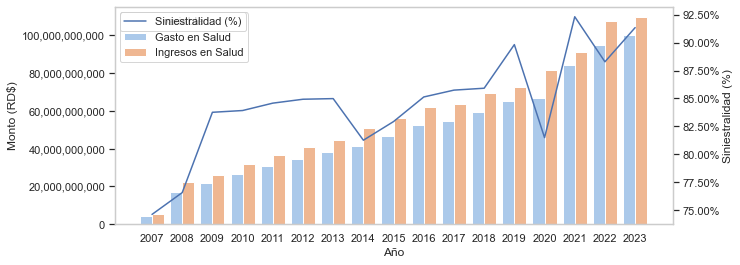

In [35]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 4))

ax = plt.axes()        
ax.yaxis.grid()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


# Crear el gráfico de barras
sns.barplot(x='Año', y='value', hue='variable', data=pd.melt(ingresos_gastos, ['Año']), palette="pastel")

# Agregar título y etiquetas
plt.xlabel('Año')
plt.ylabel('Monto (RD$)')

ax2 = plt.gca().twinx()
ax2.yaxis.grid()
sns.lineplot(x='Año', y='siniestralidad', data=siniestros, label='Siniestralidad (%)')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))


plt.xlabel('Año')
plt.ylabel('Siniestralidad (%)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [22]:
siniestros["siniestralidad"] = siniestros["siniestralidad"].apply(lambda x : "{:.2%}".format(x))

In [23]:
siniestros

,Año,Gasto en Salud,Ingresos en Salud,siniestralidad
0,2007,"4,121,991,421.00","5,523,608,447.00",74.62%
1,2008,"16,955,930,329.00","22,142,481,123.00",76.58%
2,2009,"22,019,295,731.00","26,287,983,913.00",83.76%
3,2010,"26,787,568,988.13","31,920,333,712.12",83.92%
4,2011,"30,846,483,732.85","36,470,162,440.59",84.58%
5,2012,"34,690,362,030.56","40,845,999,272.97",84.93%
6,2013,"38,061,033,338.51","44,784,987,297.98",84.99%
7,2014,"41,427,574,789.16","50,979,257,932.26",81.26%
8,2015,"46,731,271,641.40","56,347,378,812.01",82.93%
9,2016,"52,671,032,106.01","61,869,360,343.76",85.13%


In [24]:
general_data = pd.read_excel("datos.xlsx",sheet_name=None)

In [25]:
general_data.keys()

dict_keys(['Siniestralidad', 'Prestaciones_Servicios', 'Prestaciones_Montos'])

In [26]:
general_data = pd.read_excel("datos.xlsx",sheet_name=None)
dataframe_siniestralidad = general_data["Siniestralidad"]
dataframe_Prestaciones_Servicios = general_data["Prestaciones_Servicios"]
dataframe_Prestaciones_Montos = general_data["Prestaciones_Montos"]

In [27]:
general_data = pd.read_excel("datos.xlsx",sheet_name=None)
dataframe_siniestralidad = general_data["Siniestralidad"]
dataframe_Prestaciones_Servicios = general_data["Prestaciones_Servicios"]
dataframe_Prestaciones_Montos = general_data["Prestaciones_Montos"]

siniestralidad_general = dataframe_siniestralidad.pivot_table(index="Año",values={"Ingresos en Salud", "Gasto en Salud"},aggfunc=np.sum).reset_index()
siniestralidad_general["Siniestralidad"] = siniestralidad_general["Gasto en Salud"]/siniestralidad_general["Ingresos en Salud"]
siniestralidad_general["Siniestralidad"] = siniestralidad_general["Siniestralidad"].apply(lambda x : "{:.2%}".format(x))
siniestralidad_general

,Año,Gasto en Salud,Ingresos en Salud,Siniestralidad
0,2007,"4,121,991,421.00","5,523,608,447.00",74.62%
1,2008,"16,955,930,329.00","22,142,481,123.00",76.58%
2,2009,"22,019,295,731.00","26,287,983,913.00",83.76%
3,2010,"26,787,568,988.13","31,920,333,712.12",83.92%
4,2011,"30,846,483,732.85","36,470,162,440.59",84.58%
5,2012,"34,690,362,030.56","40,845,999,272.97",84.93%
6,2013,"38,061,033,338.51","44,784,987,297.98",84.99%
7,2014,"41,427,574,789.16","50,979,257,932.26",81.26%
8,2015,"46,731,271,641.40","56,347,378,812.01",82.93%
9,2016,"52,671,032,106.01","61,869,360,343.76",85.13%


In [28]:
dataframe_siniestralidad["Regimen_Financiamento"].unique()

array(['Régimen Subsidiado', 'Régimen Contributivo', 'Otros Planes'],
      dtype=object)